Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>


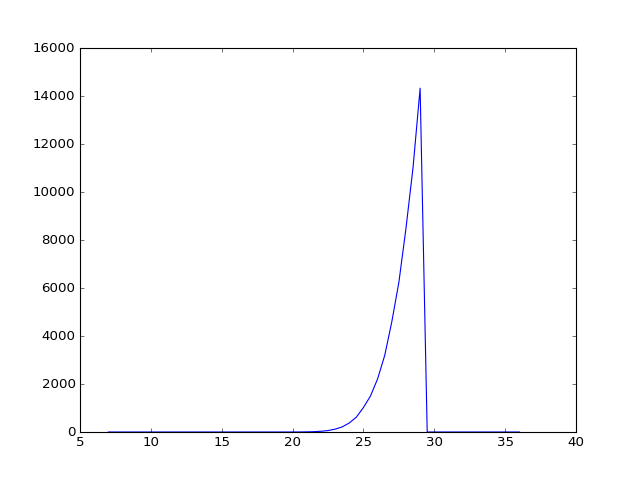

In [15]:
%pylab nbagg

# Here are some variables to define

detector_origin = 50
source_origin = 50
phantom_thickness = 10
phantom_material = 'water'

# This is the part that imports the spectra file
with open('./Spectra/Tin_Split_More_Realistic.spec') as ff:
    w, h = [float(x) for x in next(ff).split()]
    Spec = [[float(x) for x in line.split()] for line in ff]
    
Attenuation = np.zeros([])

# Complicated way of taking the data from the text file

with open('./Attenuation_Coefficients/Muscle lo Z Woodard 1986.mat') as f:
    for i, line in enumerate(f):
        if i == 2:
            density = float(line.strip())
        if 7 == i:
            lst = line.strip().split(' ')
            lst = [float(i) for i in lst]
            Attenuation = np.asarray(lst)
        if 7 < i:
            lst = line.strip().split(' ')
            lst = [float(i) for i in lst]
            Attenuation = np.vstack((Attenuation,np.asarray(lst)))
            
def find_nearest(array, value):
    return (np.abs(array - value)).argmin()

Spec = np.array(Spec)

Ev = Spec[:,0]
Int = Spec[:,1]

plt.plot(Ev[1:60],Int[1:60])

In [2]:
# This is the part that creates the geometry

image = np.zeros([30,30])
xx,yy = np.meshgrid(range(30),range(30))

xx = abs(xx - mean(mean(xx)))
yy = abs(yy - mean(mean(yy)))

In [14]:
# Attenuation step

for x in range(512):
    for y in range(512):
        for ii,energy in enumerate(Ev[0:60]):
            
            
            #if -np.exp(-0.05*yy) +4*(yy+10)**2 
            # Don't want to use this
            # distance = (xx[x,y]**2 + yy[x,y]**2 + (source_origin + detector_origin)**2)**0.5
            
            ratio = 1 #distance/(source_origin + detector_origin)
            
            idx = find_nearest(Attenuation[:,0],energy)
            mu = Attenuation[idx,7] 

            image[x,y] += Int[ii]*np.exp(-mu*ratio*phantom_thickness) 

TypeError: 'Image' object is not subscriptable

In [4]:
size(Attenuation)

376

In [5]:
Attenuation = np.zeros([])

# Complicated way of taking the data from the text file

with open('./Attenuation_Coefficients/Muscle lo Z Woodard 1986.mat') as f:
    for i, line in enumerate(f):
        if i == 2:
            density = float(line.strip())
        if 7 == i:
            lst = line.strip().split(' ')
            lst = [float(i) for i in lst]
            Attenuation = np.asarray(lst)
        if 7 < i:
            lst = line.strip().split(' ')
            lst = [float(i) for i in lst]
            Attenuation = np.vstack((Attenuation,np.asarray(lst)))

<IPython.core.display.Javascript object>


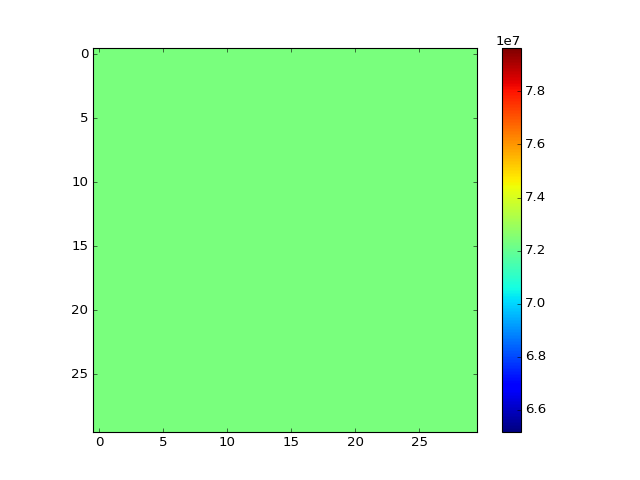

In [6]:
plt.figure()
plt.imshow(image)
plt.colorbar()

In [32]:
from PIL import Image
import random
import math
import matplotlib.pyplot as plt
 
def generate_voronoi_diagram(width, height, num_cells):
    image = Image.new("L", (width, height))
    putpixel = image.putpixel
    imgx, imgy = image.size
    nx = []
    ny = []
    nr = []
    ng = []
    nb = []
    nx2 = []
    ny2 = []
    nr2 = []
    ng2 = []
    nb2 = []
    for i in range(num_cells):
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        nr.append(random.randrange(256))
        ng.append(random.randrange(256))
        nb.append(random.randrange(256))
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            putpixel((x, y), nr[j]) #(nr[j], ng[j], nb[j]))
    image.save("VoronoiDiagram.png", "PNG")
    image.show()
    return image
 
image = generate_voronoi_diagram(512, 512, 25)

In [27]:
help(image.putpixel)

Help on method putpixel in module PIL.Image:

putpixel(xy, value) method of PIL.Image.Image instance
    Modifies the pixel at the given position. The color is given as
    a single numerical value for single-band images, and a tuple for
    multi-band images.
    
    Note that this method is relatively slow.  For more extensive changes,
    use :py:meth:`~PIL.Image.Image.paste` or the :py:mod:`~PIL.ImageDraw`
    module instead.
    
    See:
    
    * :py:meth:`~PIL.Image.Image.paste`
    * :py:meth:`~PIL.Image.Image.putdata`
    * :py:mod:`~PIL.ImageDraw`
    
    :param xy: The pixel coordinate, given as (x, y).
    :param value: The pixel value.



In [33]:
#image=image.convert('L')
pix = np.array(image)

<IPython.core.display.Javascript object>


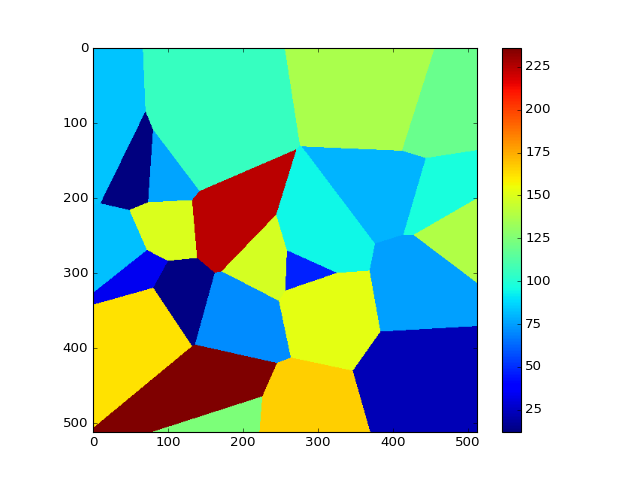

In [34]:
plt.figure()
plt.imshow(pix)
plt.colorbar()

In [11]:
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.RuntimeWarning(builtins.Warning)
        DecompressionBombWarning
    builtins.object
        Ima